## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

## Loading Dataset

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


## Applying Scaling & Handling Missing Values & Handling Outliers

In [6]:
X = data.drop(['target', 'id'], axis=1)  # Drop both 'target' and 'id' columns
y = data['target']

In [7]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


## Imputing Null Values

In [8]:
X = X.fillna(X.mean()) # Missing Values replaced with Mean

In [9]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


# Remove outliers column-wise using IQR

In [10]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows that are within the IQR range across all columns
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

X = X[mask]
y = y[mask]  # Make sure to align target too

In [11]:
X # Outliers are removed

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
6,2,1,3,1,0,0,1,0,0,0,...,3,0,0,10,0,1,0,0,1,0
13,1,1,3,1,0,0,1,0,0,0,...,2,0,4,3,0,0,1,0,1,0
32,2,1,2,1,0,1,0,0,0,0,...,6,1,4,11,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595174,3,2,1,1,0,1,0,0,0,0,...,6,0,2,8,0,0,1,0,0,0
595180,1,1,3,0,0,1,0,0,0,0,...,7,1,7,10,0,0,0,1,1,0
595183,1,1,9,0,0,1,0,0,0,0,...,2,2,3,7,0,1,1,0,1,0
595204,1,2,2,1,0,0,1,0,0,0,...,3,1,3,9,0,1,0,0,1,0


In [12]:
## Apply Scaling

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled # we have used Standard Scaling here and you can see that scaled values are stored in X_scaled

array([[-0.93830448, -0.57024824, -0.76363638, ..., -0.63765229,
        -0.73431186,  0.        ],
       [-0.93830448,  1.33022687, -1.55076906, ...,  1.56825282,
         1.36181922,  0.        ],
       [ 0.32637512, -0.57024824, -0.37007004, ..., -0.63765229,
         1.36181922,  0.        ],
       ...,
       [-0.30596468, -0.57024824,  1.991328  , ..., -0.63765229,
         1.36181922,  0.        ],
       [-0.30596468,  1.33022687, -0.76363638, ..., -0.63765229,
         1.36181922,  0.        ],
       [-0.30596468, -0.57024824,  2.38489433, ..., -0.63765229,
        -0.73431186,  0.        ]])

In [15]:
# Apply PCA to retain 85% variance

In [16]:
pca = PCA(n_components=0.85, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
## Using PCA we are retaining 85% information (variance) and getting main 29 columns from 59 columns after Dimensionality Reduction

In [17]:
X_pca

array([[ 2.79569887, -2.75261623, -0.28973853, ..., -0.92184443,
        -0.63362622,  0.41784617],
       [ 1.3896224 ,  0.03420772, -2.88720582, ...,  0.36635712,
        -0.22657703, -0.32891396],
       [-1.22194683, -1.95110848, -1.66003833, ...,  1.29535891,
        -1.12087621,  0.58114064],
       ...,
       [ 0.81915731,  0.53057925,  1.16264273, ...,  1.63002803,
        -0.197759  ,  0.10442717],
       [-2.32362284,  0.83195453, -1.262861  , ..., -0.96136423,
         1.11607144,  1.36581895],
       [ 1.86088666,  1.36627492,  1.11624301, ..., -0.52485789,
         0.78674152,  0.52426306]])

In [18]:
X_pc = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [ ]:
# Just converting Numpy array to DataFrame to see the reduced columns

In [19]:
X_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,2.795699,-2.752616,-0.289739,1.086303,-0.158491,-1.427846,1.989248,-0.605224,0.211155,-0.620228,...,-1.877549,-2.395432,1.052060,0.348314,1.533150,0.120069,-0.490967,-0.921844,-0.633626,0.417846
1,1.389622,0.034208,-2.887206,2.211268,0.650138,-1.030485,0.612607,1.336574,-0.685850,-1.223559,...,0.867184,-0.699867,0.044421,1.296840,-0.877820,0.493516,-1.403723,0.366357,-0.226577,-0.328914
2,-1.221947,-1.951108,-1.660038,-2.253676,-1.477828,-0.574393,0.328345,0.426170,-0.936253,-1.291059,...,-0.303270,-0.643167,-0.294241,-0.747682,-0.881064,-2.193286,-0.601763,1.295359,-1.120876,0.581141
3,-3.762734,-0.966795,0.970204,0.035789,0.991160,-0.606659,1.013825,1.259176,0.823099,0.424427,...,0.760136,1.524862,1.660067,0.090019,0.407878,-0.448661,-0.536835,-0.660795,-0.558740,0.852680
4,0.307408,0.578930,-0.469207,0.672699,0.790775,0.873044,-1.707397,0.293220,-0.662285,0.991027,...,-0.531847,-0.142474,-0.588195,-0.051614,0.983341,-1.252586,0.561433,-0.012286,-0.202963,-0.820641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59324,-0.100758,-2.690024,1.047190,0.124191,1.209243,-0.120574,1.012959,-0.846716,0.133020,-0.345579,...,0.873807,0.662498,1.611361,0.063107,-1.015964,-1.692041,0.569683,-0.932161,2.442530,0.050660
59325,0.843313,1.118212,-0.262361,1.263766,0.816428,1.516594,-0.243304,-1.018872,0.724793,1.294176,...,1.590369,-2.883219,-0.854074,0.681164,0.024776,0.664900,0.440191,-0.354701,-1.703977,-0.313911
59326,0.819157,0.530579,1.162643,0.557076,0.132827,0.737210,-1.728290,-0.352854,0.257522,0.513992,...,-0.453521,1.814359,-1.920777,-0.765956,0.567386,-0.628994,0.571972,1.630028,-0.197759,0.104427
59327,-2.323623,0.831955,-1.262861,-1.141303,1.356962,0.195268,-0.534718,1.147904,-1.223377,-1.010539,...,-1.295793,-0.777259,-0.720765,-1.336497,-0.506960,0.829310,-0.425727,-0.961364,1.116071,1.365819


In [39]:
## As we got 31 columns now we're checking the correlation of X_pc with target column
### We are selecting only 29 columns from 59 columns as they are dimensionally reduced using PCA

### Checking MultiCollinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Use only numeric features
X_var = X_pc.select_dtypes(include=['float64', 'int64'])
X_var = add_constant(X_var)  # adds intercept for VIF

vif_df = pd.DataFrame()
vif_df['Feature'] = X_var.columns
vif_df['VIF'] = [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])]

print(vif_df)

   Feature  VIF
0    const  1.0
1      PC1  1.0
2      PC2  1.0
3      PC3  1.0
4      PC4  1.0
5      PC5  1.0
6      PC6  1.0
7      PC7  1.0
8      PC8  1.0
9      PC9  1.0
10    PC10  1.0
11    PC11  1.0
12    PC12  1.0
13    PC13  1.0
14    PC14  1.0
15    PC15  1.0
16    PC16  1.0
17    PC17  1.0
18    PC18  1.0
19    PC19  1.0
20    PC20  1.0
21    PC21  1.0
22    PC22  1.0
23    PC23  1.0
24    PC24  1.0
25    PC25  1.0
26    PC26  1.0
27    PC27  1.0
28    PC28  1.0
29    PC29  1.0


In [54]:
# VIF = 1.0 for all features means:
# There is no multicollinearity among the features.
# Each feature is not linearly correlated with any other feature in the dataset.

## Apply SMOTE

In [ ]:
## Applying Smote to get balanced data in Output
## We can see that counts of 0 in output are 573518 and counts of 1 are 21694.
## It shows that huge Imbalanced data is present in Output Column
## That's Why we are applying SMOTE to balance the data

In [22]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_pca, y)

In [23]:
y_series = pd.Series(y_balanced)

In [24]:
y_series.value_counts() # After Applying Smote

target
0    57819
1    57819
Name: count, dtype: int64

In [25]:
y.value_counts() # Before Applying Smote

target
0    57819
1     1510
Name: count, dtype: int64

## Split the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

## Importing All Models 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Applying Models

## Random Forest Classifier

In [29]:
# rfc_model = RandomForestClassifier(random_state=42)
# rfc_model.fit(X_train, y_train)
# rfc_pred = rfc_model.predict(X_test)

In [30]:
# # Accuracy
# rfc_y_pred_train = rfc_model.predict(X_train)
# print("Training Random Forest Classifier Accuracy:", accuracy_score(y_train, rfc_y_pred_train))
# print("Testing Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_pred))

# # f1_score
# print("Training Random Forest Classifier f1_score:", f1_score(y_train, rfc_y_pred_train))
# print("Testing Random Forest Classifier f1_score:", f1_score(y_test, rfc_pred))

Training Random Forest Classifier Accuracy: 1.0
Testing Random Forest Classifier Accuracy: 0.9897526807333102
Training Random Forest Classifier f1_score: 1.0
Testing Random Forest Classifier f1_score: 0.9896293703233711


## Logistic Regression

In [31]:
# # Logistic Regression
# log_model = LogisticRegression(max_iter=1000, random_state=42)
# log_model.fit(X_train, y_train)
# log_pred = log_model.predict(X_test)

In [32]:
# # Accuracy
# y_predii_train = log_model.predict(X_train)
# print("Training Logistic Reg Accuracy:", accuracy_score(y_train, y_predii_train))
# print("Testing Logistic Reg Accuracy:", accuracy_score(y_test, log_pred))

# # f1_score
# print("Training Logistic Reg f1_score:", f1_score(y_train, y_predii_train))
# print("Testing Logistic Reg f1_score:", f1_score(y_test, log_pred))

Training Logistic Reg Accuracy: 0.5694843800670197
Testing Logistic Reg Accuracy: 0.5680560359737116
Training Logistic Reg f1_score: 0.5760875349916446
Testing Logistic Reg f1_score: 0.5718693751607097


## Decision Tree Classifier

In [33]:
# # Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)
# dt_pred = dt_model.predict(X_test)

In [34]:
# # Accuracy
# y_predi_train = dt_model.predict(X_train)
# print("Training Decision Tree Classifier Accuracy:", accuracy_score(y_train, y_predi_train))
# print("Testing Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_pred))

# # f1_score
# print("Training Decision Tree Classifier f1_score:", f1_score(y_train, y_predi_train))
# print("Testing Decision Tree Classifier f1_score:", f1_score(y_test, dt_pred))

Training Decision Tree Classifier Accuracy: 1.0
Testing Decision Tree Classifier Accuracy: 0.8819612590799032
Training Decision Tree Classifier f1_score: 1.0
Testing Decision Tree Classifier f1_score: 0.8850623105422701


## XGBoost

In [35]:
## XGBoost
!pip install xgboost

In [41]:
# Define and train the model
xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    gamma=1,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

In [42]:
# Accuracy
y_pred_train = xgb_model.predict(X_train)
print("Training XGBoost Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# f1_score
print("Training XGBoost f1_score:", f1_score(y_train, y_pred_train))
print("Testing XGBoost f1_score:", f1_score(y_test, xgb_pred))

Training XGBoost Accuracy: 0.9873635282672144
Testing XGBoost Accuracy: 0.9632480110688343
Training XGBoost f1_score: 0.9875546944033387
Testing XGBoost f1_score: 0.9638605442176871


## Better Visual Diagnostics for Classification

### Confusion Matrix

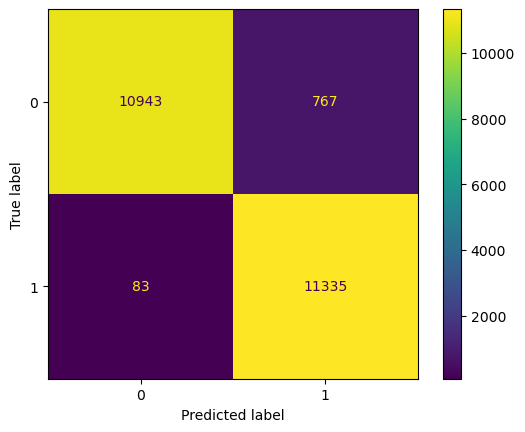

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)

### Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11710
           1       0.94      0.99      0.96     11418

    accuracy                           0.96     23128
   macro avg       0.96      0.96      0.96     23128
weighted avg       0.96      0.96      0.96     23128



In [ ]:
## Here We can see that XGBoost is giving the best f1_score & Accuracy Score So we will choose XGBoost

### Hyperparameter Tuning for XGBoost Classifier

In [38]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0, 1, 5]
# }

# xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# print("Best Params:", grid_search.best_params_)
# print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Params: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.9637183514112382


### Summarised Results of Hyperparameter Tuning of XGBoost Model using GridSearchCV

In [51]:
# print(Best Params XGBoost: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8})
# print(Best F1 Score: 0.9637183514112382)

## SVC for classifier

In [37]:
# svc_model = SVC(kernel = 'rbf', random_state= 42)
# svc_model.fit(X_train,y_train)
# svc_pred = svc_model.predict(X_test)

In [38]:
# # Accuracy
# svc_y_pred_train = svc_model.predict(X_train)
# print("Training XGBoost Accuracy:", accuracy_score(y_train, svc_y_pred_train))
# print("Testing XGBoost Accuracy:", accuracy_score(y_test, svc_pred))

# # f1_score
# print("Training XGBoost f1_score:", f1_score(y_train, svc_y_pred_train))
# print("Testing XGBoost f1_score:", f1_score(y_test, svc_pred))

Training XGBoost Accuracy: 0.9834504377905091
Testing XGBoost Accuracy: 0.9756139744033206
Training XGBoost f1_score: 0.9837475186038365
Testing XGBoost f1_score: 0.9758520294570988


### Making Pickle File

In [55]:
import pickle

In [60]:
# Saving the trained Model with Pickle

In [59]:
with open('xgb_insurance_claim_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [61]:
# can be loaded back this model when needed using this code

In [63]:
# with open('xgb_insurance_claim_model.pkl', 'rb') as f:
#     loaded_xgb_model = pickle.load(f)

# xgb_pred_loaded = loaded_xgb_model.predict(X_test)
# print("Predictions using the loaded model:", xgb_pred_loaded)

### Suggestions :-

##### 1. Personalized pricing and plans based on risk.

##### 2. Targeted marketing campaigns using predictive segmentation.

##### 3. Simplify the buying process with AI-powered tools.

##### 4. Build trust through transparency in data usage.